<a href="https://colab.research.google.com/github/11daniel/CSINTSY/blob/main/CSINTSY_S12_04_MC03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
This project aims to compare machine learning models for classification tasks. Two machine learning models, specifically K-Nearest Neighbors and Random Forest, will be used to classify the given dataset.  Before testing the model, the dataset will undergo the process of cleaning to minimize errors caused by the models. To test the performance of a model, an accuracy test from Scikit-Learn will be used on the outputs of both models.

# **Dataset**
The dataset that was used for this project is titled “Netflix Stock Price” obtained from Kaggle and it has seven columns, namely the date, open, close, adj close, low, high, and volume. The date refers to the day that the stock prices were recorded. Open refers to the price of the stock when the market opened and close or adj close is for the price of the stock after the market has closed. Low refers to the stock price being at its lowest for the day while high is its highest price. Lastly, volume is the number of shares bought for that day.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas_datareader as web
import datetime as dt

# Import K-Nearest Neighbors Classification algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Import for evaluating the performance of regression models in machine learning
from sklearn.metrics import r2_score
import math

# Import the scikit learn library for calculating accuracy
from sklearn.metrics import accuracy_score

# Import Random Forest Classification algorithms
from sklearn.ensemble import RandomForestClassifier

# **Data Preparation**

In [ ]:
#load NFLX data from dataset
stock = pd.read_csv('/content/drive/Shareddrives/CSINTSY MCO3/NFLX.csv') #https://www.kaggle.com/datasets/jainshukal/netflix-stock-price/
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
...,...,...,...,...,...,...,...
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700


# **Data Cleaning**

Data Cleainng Steps:


1.   Check the head of the data
2.   Check the data information
3.   Check missing values in the dataset
4.   Plot the data



In [ ]:
#Checking top of data
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [ ]:
# Check the data information
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [ ]:
#Check missing values
stock.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,226.708094,229.972979,223.105690,226.670159,226.670159,9.730586e+06
std,103.305422,104.851349,101.458611,103.203785,103.203785,6.398967e+06
min,80.570000,84.699997,79.949997,82.790001,82.790001,1.616300e+06
25%,125.779999,127.165001,124.355000,125.514999,125.514999,5.573200e+06
50%,197.850006,199.440002,195.330002,198.000000,198.000000,7.857600e+06
75%,325.529999,330.835006,318.869995,325.220001,325.220001,1.178630e+07
max,421.380005,423.209991,413.079987,418.970001,418.970001,5.841040e+07


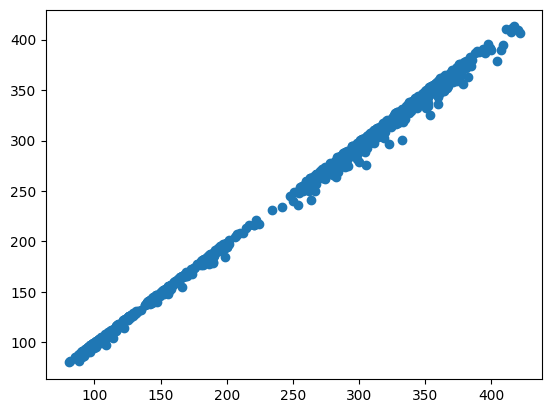

In [ ]:
# Visualize the data
plt.scatter(stock['Open'], stock['Low'])

In [ ]:
# Shuffle the data to reduce bias
stock = stock.sample(frac=1)
stock

,Date,Open,High,Low,Close,Adj Close,Volume
430,2017-08-31,175.449997,176.240005,173.860001,174.710007,174.710007,6941000
293,2017-02-15,140.720001,142.429993,140.509995,142.270004,142.270004,5309100
816,2019-03-18,362.470001,370.970001,361.859985,363.440002,363.440002,7194700
494,2017-12-01,186.990005,189.800003,185.000000,186.820007,186.820007,6219500
511,2017-12-27,187.800003,188.100006,185.220001,186.240005,186.240005,4002100
...,...,...,...,...,...,...,...
602,2018-05-09,328.790009,331.950012,327.510010,330.299988,330.299988,5633400
267,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5771800
298,2017-02-23,144.449997,144.490005,141.520004,142.779999,142.779999,4668000
827,2019-04-02,366.250000,368.420013,362.220001,367.720001,367.720001,5158700


In [ ]:
# Fix the index
stock = stock.reset_index()
stock = stock.drop(columns='index')
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-31,175.449997,176.240005,173.860001,174.710007,174.710007,6941000
1,2017-02-15,140.720001,142.429993,140.509995,142.270004,142.270004,5309100
2,2019-03-18,362.470001,370.970001,361.859985,363.440002,363.440002,7194700
3,2017-12-01,186.990005,189.800003,185.000000,186.820007,186.820007,6219500
4,2017-12-27,187.800003,188.100006,185.220001,186.240005,186.240005,4002100
...,...,...,...,...,...,...,...
1002,2018-05-09,328.790009,331.950012,327.510010,330.299988,330.299988,5633400
1003,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5771800
1004,2017-02-23,144.449997,144.490005,141.520004,142.779999,142.779999,4668000
1005,2019-04-02,366.250000,368.420013,362.220001,367.720001,367.720001,5158700


# **Creating Training and Testing Dataset**

In [ ]:
import math

n = len(stock)
stock_training = math.ceil(n * 0.7)
print("Training samples:", stock_training)

Training samples: 705


In [ ]:
train_stock = stock.loc[:stock_training-1]
test_stock = stock.loc[stock_training:]

In [ ]:
# Check training set
train_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-31,175.449997,176.240005,173.860001,174.710007,174.710007,6941000
1,2017-02-15,140.720001,142.429993,140.509995,142.270004,142.270004,5309100
2,2019-03-18,362.470001,370.970001,361.859985,363.440002,363.440002,7194700
3,2017-12-01,186.990005,189.800003,185.000000,186.820007,186.820007,6219500
4,2017-12-27,187.800003,188.100006,185.220001,186.240005,186.240005,4002100
...,...,...,...,...,...,...,...
700,2019-09-04,291.250000,292.380005,286.510010,291.519989,291.519989,4652500
701,2018-09-14,368.549988,371.089996,363.459991,364.559998,364.559998,4756400
702,2019-07-25,318.859985,327.690002,316.299988,326.459991,326.459991,10798500
703,2017-10-13,199.699997,200.820007,197.190002,199.490005,199.490005,12081300


In [ ]:
test_stock

,Date,Open,High,Low,Close,Adj Close,Volume
705,2018-03-22,313.070007,314.119995,305.660004,306.700012,306.700012,8063300
706,2017-11-16,194.330002,197.699997,193.750000,195.509995,195.509995,5678400
707,2018-01-26,271.489990,274.600006,268.760010,274.600006,274.600006,11021800
708,2016-11-09,121.839996,123.650002,120.860001,122.190002,122.190002,7705700
709,2019-11-25,308.829987,315.730011,305.250000,315.549988,315.549988,7873900
...,...,...,...,...,...,...,...
1002,2018-05-09,328.790009,331.950012,327.510010,330.299988,330.299988,5633400
1003,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5771800
1004,2017-02-23,144.449997,144.490005,141.520004,142.779999,142.779999,4668000
1005,2019-04-02,366.250000,368.420013,362.220001,367.720001,367.720001,5158700


In [ ]:
# Convert the training set to a matrix (numpy format)
# Remove the Id
train_data = train_stock[['Open', 'Low']].to_numpy()
train_data

array([[175.449997, 173.860001],
       [140.720001, 140.509995],
       [362.470001, 361.859985],
       ...,
       [318.859985, 316.299988],
       [199.699997, 197.190002],
       [181.009995, 180.699997]])

In [ ]:
# Create a binary target variable indicating whether 'Low' increases or decreases
stock['PriceChange'] = stock['Low'].diff().apply(lambda x: 1 if x > 0 else 0)

# Extract features and labels
X = stock[['Open']]
y = stock['PriceChange']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **KNN**
A supervised learning classifier that uses proximity to make classifications or predictions about the grouping of an individual data point.

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

In [ ]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.24257425742574257
Mean Absolute Error (MAE): 0.24257425742574257
R-squared (R2): 0.02009702009701997


In [ ]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 75.74%


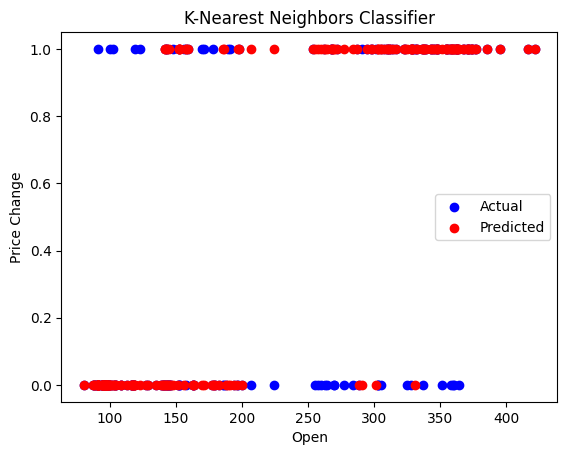

In [ ]:
# Plot the data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Open')
plt.ylabel('Price Change')
plt.title('K-Nearest Neighbors Classifier')
plt.legend()
plt.show()

# **Implementation of K-Nearest Neighbors**
A binary target variable, PriceChange, is created based on whether the Low price increases or decreases. If the difference is positive, the value is set to 1; otherwise, it's set to 0. The dataset is split into training and testing sets using the train_test_split function. 80% of the data is used for training (*X_train, y_train*), and 20% is reserved for testing (*X_test, y_test*). The features are standardized using StandardScaler to ensure that they have zero mean and unit variance. A K-Nearest Neighbors classifier is created with 5 neighbors. Predictions are made on the test set (X_test_scaled) using the trained K-Nearest Neighbors model. *Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2)* are calculated using the predicted values (*y_pred*) and the actual values (*y_test*). For visualization of results, a  scatter plot is created wherein the actual values are in blue and predicted values are in red.



**Advantages:** KNN has fewer hyperparameters which only requires a k value and distance metric.

**Disadvantages:** More memory and data storage are required than with other classifiers which could also take longer to compute.

# **Random Tree Forest**
A supervised machine learning algorithm commonly used for classification and regression problems. Random Forest has three main hyperparameters namely node size, number of trees, and the number of features sampled. This algorithm generates a single outcome by combining the output of multiple decision trees.

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.29207920792079206
Mean Absolute Error (MAE): 0.29207920792079206
R-squared (R2): -0.17988317988317992


In [ ]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 70.79%


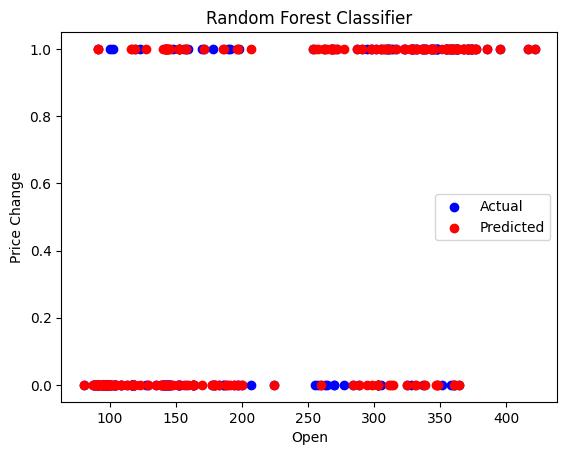

In [ ]:
# Plot the data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Open')
plt.ylabel('Price Change')
plt.title('Random Forest Classifier')
plt.legend()
plt.show()

# **Implementation of Random Forest**
A binary target variable, PriceChange, is created based on whether the Low price increases or decreases. If the difference is positive, the value is set to 1; otherwise, it's set to 0. The dataset is split into training and testing sets using the train_test_split function. 80% of the data is used for training (*X_train, y_train*), and 20% is reserved for testing (*X_test, y_test*). A Random Forest Classifier is created with 100 trees and a fixed random state of 42  for reproducibility. Predictions are made on the test set (*X_test*) using the trained model. *Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2)* are calculated using the predicted values (*y_pred*) and the actual values (*y_test*). For visualization of results, a  scatter plot is created wherein the actual values are in blue and predicted values are in red.



**Advantages:** In general, Random Forest is quite flexible since it can handle both regression and classification tasks. It has a certain characteristic called Feature bagging that maintains the accuracy of data by estimating the missing values.

**Disadvantages:** Given that Random Forest can handle large data sets, it can be quite slow in processing data since it computes the data for each individual decision tree.

# **Evaluation of Findings**
The K-Nearest Neighbors (KNN) and Random Forest Classifiers were used to predict the price changes in Netflix stocks, utilizing the 'Open' price and 'Low' price as predictive features. While the KNN model achieved an accuracy of 75.74%, and the Random Forest Model obtained 70.79%, bothe models showed significant limitations in their predictive capabilities. The analysis on their respective evaluation metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2), highlighted challenges in their performance. Particularly, the negative R2 results were concerning, indicating weak and limited predictive capacity when relying on the chosen features.

These findings highlight the difficulty of relying solely on the 'Open' and 'Low' feature to accurately predict complex stock price movements. The models struggled to capture the complicated stock movements, as evidenced by their high error rates and inadequate predictive performance, even if they achieved moderate accuracies. This assessment emphasizes the need for a more comprehensive approach to modeling stock price changes.     


# **Acknowledgement**
The group has used ChatGPT for the following purposes:

# **References**
What is Random Forest? | IBM. (n.d.). https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems


What is the k-nearest neighbors algorithm? | IBM. (n.d.). https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.